In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

# Catfish Sales Data

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [3]:
#read data
catfish_sales = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

/var/folders/r7/669zllp50w3dt5hksf5_4bsw0000gn/T/ipykernel_9358/1445458959.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  catfish_sales = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


In [4]:
#infer the frequency of the data
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))

In [5]:
start_date = datetime(1996,1,1)
end_date = datetime(2000,1,1)
lim_catfish_sales = catfish_sales[start_date:end_date]

In [6]:
#At December 1 1998
lim_catfish_sales[datetime(1998,12,1)] = 10000

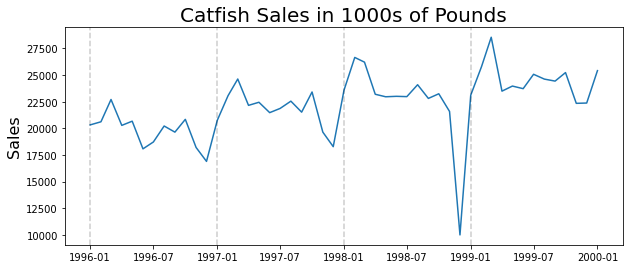

In [7]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Remove the trend

In [8]:
first_diff = lim_catfish_sales.diff()[1:]

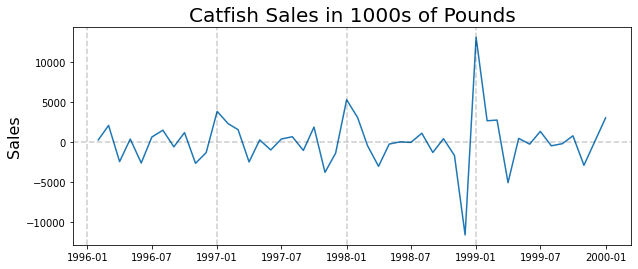

In [9]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

# Get training and testing sets

In [10]:
train_end = datetime(1999,7,1)
test_end = datetime(2000,1,1)

test_data = lim_catfish_sales[train_end + timedelta(days=1):test_end]

# Make Predictions

In [11]:
my_order = (0,1,0)
my_seasonal_order = (1, 0, 1, 12)

In [12]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = lim_catfish_sales[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

/Users/puche99/Desktop/hackathons/TimeSeries/venv-ts/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/puche99/Desktop/hackathons/TimeSeries/venv-ts/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.97816D+00    |proj g|=  1.75024D+00

At iterate    5    f=  9.39116D+00    |proj g|=  1.20683D-01

At iterate   10    f=  9.34527D+00    |proj g|=  5.02080D-03

At iterate   15    f=  9.33920D+00    |proj g|=  7.59409D-03

At iterate   20    f=  9.22783D+00    |proj g|=  2.30546D-03

At iterate   25    f=  9.21700D+00    |proj g|=  1.00041D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   

/Users/puche99/Desktop/hackathons/TimeSeries/venv-ts/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/puche99/Desktop/hackathons/TimeSeries/venv-ts/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.
/Users/puche99/Desktop/hackathons/TimeSeries/venv-ts/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.65666D+00    |proj g|=  6.37404D-01

At iterate    5    f=  9.36119D+00    |proj g|=  3.22615D-01

At iterate   10    f=  9.20556D+00    |proj g|=  7.03406D-02

At iterate   15    f=  9.16469D+00    |proj g|=  1.89226D-02

At iterate   20    f=  9.14715D+00    |proj g|=  1.34249D-02

At iterate   25    f=  9.13792D+00    |proj g|=  7.06972D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     61      1     0     0   

/Users/puche99/Desktop/hackathons/TimeSeries/venv-ts/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate   20    f=  9.39198D+00    |proj g|=  1.19119D-02

At iterate   25    f=  9.13244D+00    |proj g|=  3.53449D-03

At iterate   30    f=  9.03202D+00    |proj g|=  1.72536D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     57      1     0     0   1.686D-03   9.032D+00
  F =   9.0320139636088150     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/puche99/Desktop/hackathons/TimeSeries/venv-ts/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/puche99/Desktop/hackathons/TimeSeries/venv-ts/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02629D+01    |proj g|=  2.11414D+00

At iterate    5    f=  9.47877D+00    |proj g|=  8.82669D-02

At iterate   10    f=  9.42674D+00    |proj g|=  2.48808D-03

At iterate   15    f=  9.36816D+00    |proj g|=  3.41880D-02

At iterate   20    f=  9.20016D+00    |proj g|=  3.78031D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   2.226D-06   9.200D+00
  F =   9.2000887749670159     

CONVERG

/Users/puche99/Desktop/hackathons/TimeSeries/venv-ts/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate   20    f=  9.04544D+00    |proj g|=  7.76496D-03

At iterate   25    f=  9.04349D+00    |proj g|=  1.37220D-02

At iterate   30    f=  9.04284D+00    |proj g|=  5.06709D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     52      1     0     0   2.036D-03   9.043D+00
  F =   9.0427560296190883     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [13]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

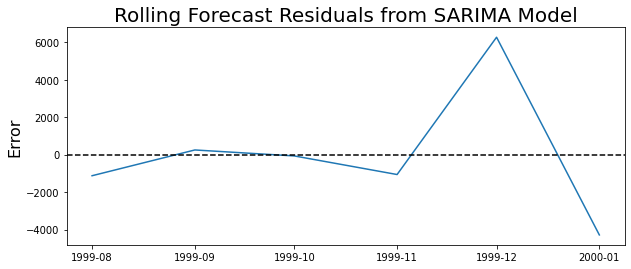

In [14]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

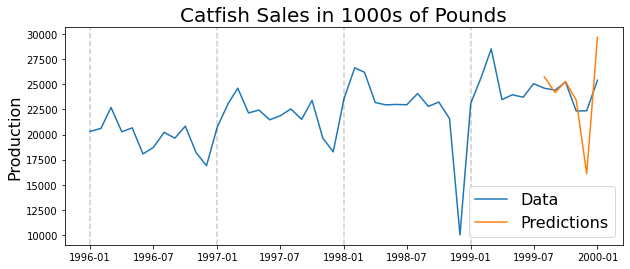

In [15]:
plt.figure(figsize=(10,4))

plt.plot(lim_catfish_sales)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [16]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

Mean Absolute Percent Error: 0.0925


In [17]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 3164.247693836315


# Detecting the Anomaly

## Attempt 1: Deviation Method

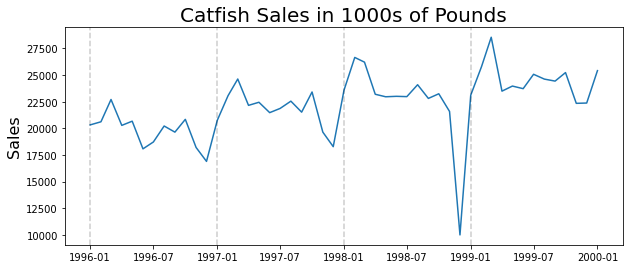

In [18]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [19]:
rolling_deviations = pd.Series(dtype=float, index = lim_catfish_sales.index)

In [20]:
for date in rolling_deviations.index:
    #get the window ending at this data point
    window = lim_catfish_sales.loc[:date]
    
    #get the deviation within this window
    rolling_deviations.loc[date] = window.std()

In [21]:
#get the difference in deviation between one time point and the next
diff_rolling_deviations = rolling_deviations.diff()
diff_rolling_deviations = diff_rolling_deviations.dropna()

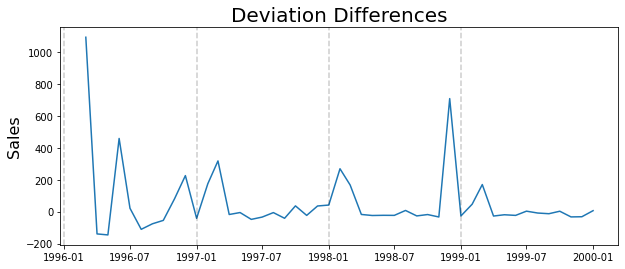

In [22]:
plt.figure(figsize=(10,4))
plt.plot(diff_rolling_deviations)
plt.title('Deviation Differences', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Attempt 2: Seasonal Method

In [23]:
month_deviations = lim_catfish_sales.groupby(lambda d: d.month).std()

Text(0, 0.5, 'Sales')

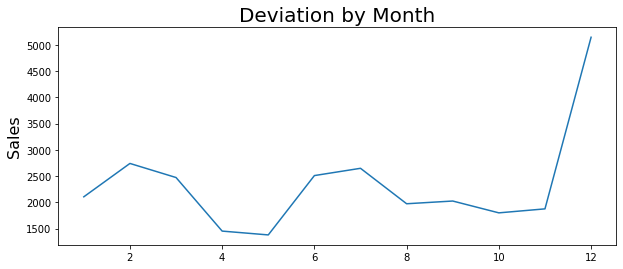

In [24]:
plt.figure(figsize=(10,4))
plt.plot(month_deviations)
plt.title('Deviation by Month', fontsize=20)
plt.ylabel('Sales', fontsize=16)

## So, the anomaly occurs in a December

In [25]:
december_data = lim_catfish_sales[lim_catfish_sales.index.month == 12]

In [26]:
december_data

Date
1996-12-01    16898
1997-12-01    18278
1998-12-01    10000
1999-12-01    22372
Name: Total, dtype: int64

In [27]:
min_dev = 9999999
curr_anomaly = None
for date in december_data.index:
    other_data = december_data[december_data.index != date]
    curr_dev = other_data.std()
    if curr_dev < min_dev:
        min_dev = curr_dev
        curr_anomaly = date

In [28]:
curr_anomaly

Timestamp('1998-12-01 00:00:00')

# What to do about the anomaly?

## Simple Idea: use mean of other months

In [29]:
adjusted_data = lim_catfish_sales.copy()
adjusted_data.loc[curr_anomaly] = december_data[(december_data.index != curr_anomaly) & (december_data.index < test_data.index[0])].mean()

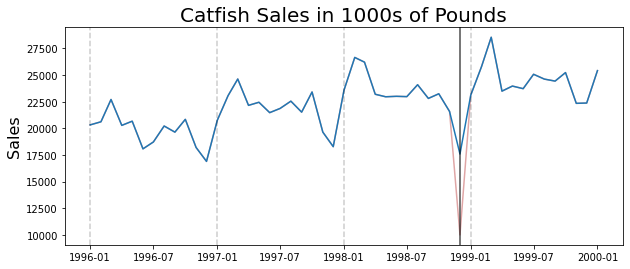

In [30]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales, color='firebrick', alpha=0.4)
plt.plot(adjusted_data)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axvline(curr_anomaly, color='k', alpha=0.7)

# Resulting Predictions

In [31]:
train_end = datetime(1999,7,1)
test_end = datetime(2000,1,1)

test_data = adjusted_data[train_end + timedelta(days=1):test_end]

In [32]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = adjusted_data[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

/Users/puche99/Desktop/hackathons/TimeSeries/venv-ts/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/puche99/Desktop/hackathons/TimeSeries/venv-ts/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.06155D+00    |proj g|=  1.50718D+00

At iterate    5    f=  8.63720D+00    |proj g|=  1.19808D-01

At iterate   10    f=  8.57598D+00    |proj g|=  2.25242D-02

At iterate   15    f=  8.57469D+00    |proj g|=  1.79907D-04

At iterate   20    f=  8.57468D+00    |proj g|=  9.86601D-04

At iterate   25    f=  8.57404D+00    |proj g|=  4.48667D-03

At iterate   30    f=  8.53453D+00    |proj g|=  1.09080D-01

At iterate   35    f=  8.52899D+00    |proj g|=  6.20368D-03

At iterate   40    f=  8.52885D+00    |proj g|=  9.32572D-04

At iterate   45    f=  8.52881D+00    |proj g|=  2.46647D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/puche99/Desktop/hackathons/TimeSeries/venv-ts/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/puche99/Desktop/hackathons/TimeSeries/venv-ts/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate    5    f=  8.61661D+00    |proj g|=  3.14469D-01

At iterate   10    f=  8.58159D+00    |proj g|=  1.26365D-02

At iterate   15    f=  8.58120D+00    |proj g|=  1.89803D-04

At iterate   20    f=  8.58118D+00    |proj g|=  2.02266D-03

At iterate   25    f=  8.57813D+00    |proj g|=  3.69747D-02

At iterate   30    f=  8.52963D+00    |proj g|=  2.18008D-02

At iterate   35    f=  8.52882D+00    |proj g|=  3.19672D-03

At iterate   40    f=  8.52873D+00    |proj g|=  1.56303D-03

At iterate   45    f=  8.52869D+00    |proj g|=  3.53383D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     46     63   

/Users/puche99/Desktop/hackathons/TimeSeries/venv-ts/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate   25    f=  8.54639D+00    |proj g|=  1.23669D-01

At iterate   30    f=  8.52392D+00    |proj g|=  1.89181D-02

At iterate   35    f=  8.52165D+00    |proj g|=  6.93304D-03

At iterate   40    f=  8.52109D+00    |proj g|=  6.04734D-03

At iterate   45    f=  8.52084D+00    |proj g|=  3.39926D-03

At iterate   50    f=  8.52078D+00    |proj g|=  2.91312D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50     62      1     0     0   2.913D-03   8.521D+00
  F =   8.5207755401786969     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/puche99/Desktop/hackathons/TimeSeries/venv-ts/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/puche99/Desktop/hackathons/TimeSeries/venv-ts/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.10928D+00    |proj g|=  9.55854D-01

At iterate    5    f=  8.52739D+00    |proj g|=  1.91638D-02

At iterate   10    f=  8.52210D+00    |proj g|=  6.10324D-03

At iterate   15    f=  8.52203D+00    |proj g|=  1.82403D-04

At iterate   20    f=  8.52198D+00    |proj g|=  1.81449D-03

At iterate   25    f=  8.51757D+00    |proj g|=  4.43254D-02

At iterate   30    f=  8.51180D+00    |proj g|=  5.53315D-03

At iterate   35    f=  8.51162D+00    |proj g|=  5.47009D-03

At iterate   40    f=  8.51150D+00    |proj g|=  2.22855D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/Users/puche99/Desktop/hackathons/TimeSeries/venv-ts/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/puche99/Desktop/hackathons/TimeSeries/venv-ts/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate   20    f=  8.54020D+00    |proj g|=  1.29525D-03

At iterate   25    f=  8.52762D+00    |proj g|=  6.21422D-02

At iterate   30    f=  8.50926D+00    |proj g|=  9.16864D-04

At iterate   35    f=  8.50911D+00    |proj g|=  6.97714D-03

At iterate   40    f=  8.50898D+00    |proj g|=  1.51920D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     44     68      1     0     0   2.551D-04   8.509D+00
  F =   8.5089687874531617     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/puche99/Desktop/hackathons/TimeSeries/venv-ts/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.78397D+00    |proj g|=  6.82758D-01

At iterate    5    f=  8.60882D+00    |proj g|=  8.89108D-02

At iterate   10    f=  8.59920D+00    |proj g|=  2.80357D-03

At iterate   15    f=  8.59918D+00    |proj g|=  1.80193D-03

At iterate   20    f=  8.59885D+00    |proj g|=  3.24363D-03

At iterate   25    f=  8.52335D+00    |proj g|=  5.59940D-02

At iterate   30    f=  8.51570D+00    |proj g|=  1.33935D-03

At iterate   35    f=  8.51554D+00    |proj g|=  8.10389D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [33]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

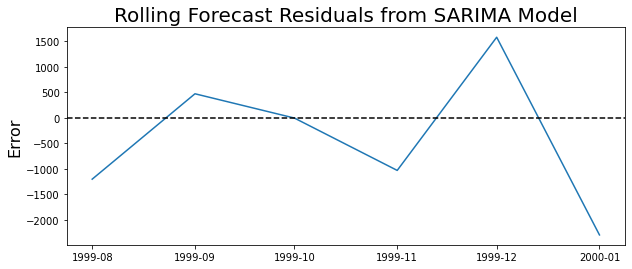

In [34]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

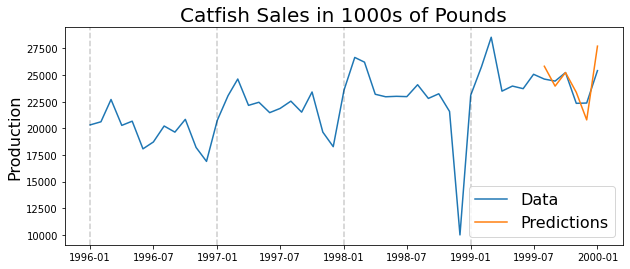

In [35]:
plt.figure(figsize=(10,4))

plt.plot(lim_catfish_sales)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [36]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

Mean Absolute Percent Error: 0.0459


In [37]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 1323.8302887352618
